<a href="https://colab.research.google.com/github/komos0509/project/blob/main/crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

찾으려는 웹툰의 이름을 입력하세요. : 
참교육
진행중...
crawling finished
걸린시간 : 2.852233139673869분


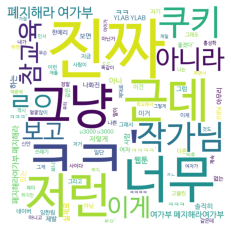

<Figure size 432x288 with 0 Axes>

In [10]:
import os
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt

base_url = 'https://comic.naver.com/webtoon/weekday.nhn' # 네이버 웹툰 홈페이지

def drive(url):
  options = webdriver.ChromeOptions()       # 크롬 드라이브 저장
  options.add_argument('--headless')        # Head-less 설정
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome('chromedriver', options=options)
  driver.implicitly_wait(3)
  driver.get(url)
  html =  driver.page_source
  soup = BeautifulSoup(html, 'html.parser') # beautifulsoup을 이용해 html 파서로 변환
  return driver, soup

driver, soup = drive(base_url)
driver.close()

title = soup.select('.title')
t_IDs = list(map(lambda x: x.get('href').split('titleId=')[1].split('&')[0],title))
t_weekdays = list(map(lambda x: x.get('href').split('weekday=')[1],title))
t_names = list(map(lambda x: x.text, title))

def find_id_weekday(name):  # 웹툰의 아이디와 연재 요일을 알아내는 함수
    try:
        idx = t_names.index(name)
    except:
        print('찾는 웹툰이 없습니다.')
        return
    return t_IDs[idx], t_weekdays[idx]

def episode_count(ID, weekday):   # 웹툰의 에피소드의 개수를 알아내는 함수
    url = base_url.split('weekday')[0] + 'list.nhn?titleId={0}&weekday={1}'.format(ID, weekday)
    driver, soup = drive(url)
    driver.close()
    res = soup.select('.title')[1].select('a')[0].get('href').split('no=')[1].split('&')[0]
    return res

def coment_crawler(name):   # 베스트 댓글 크롤링 함수
    id_num, weekday = find_id_weekday(name)
    cnt = int(episode_count(id_num, weekday))
    coments = []
    proceed = -1

    driver, _ = drive(base_url)
    print('진행중...')
    
    for i in range(1, cnt+1):
        percentage = int((1/cnt)*100)
        if percentage%10 == 0 and percentage > proceed:
            proceed = percentage
            print(proceed, '% 완료')
        url = 'https://comic.naver.com/comment/comment.nhn?titleId={0}&no={1}#'.format(id_num, str(i))
        time.sleep(1)
        driver.get(url)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        coments += list(map(lambda x: x.text, soup.select('.u_cbox_contents')))
        
    driver.close()
    print('crawling finished')

    return coments

print('찾으려는 웹툰의 이름을 입력하세요. : ')
a = input()
start = time.time()
c = coment_crawler(a)
end = time.time()
print(f'걸린시간 : {(end-start) / 60}분', )
# 워드 클라우드

wordcloud = WordCloud(font_path=path, background_color='white', width=1000, height=1000, max_words=100, max_font_size=300).generate(str(c))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.savefig('wordcloud.png')

In [ ]:
# 한글 폰트 다운로드
!apt-get update -qq
!apt-get install fonts-nanum 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 53 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,950 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 한글 폰트가 잘 다운로드 되었는지 확인
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf']

In [ ]:
# google colab에 한글 폰트 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path =  '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumBarunGothic


Text(0.5, 1.0, '안녕')

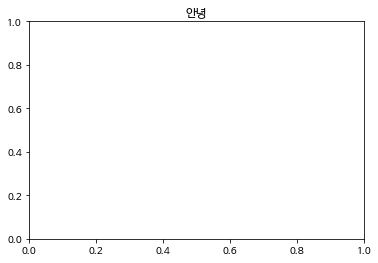

In [ ]:
# 한글 폰트 적용 확인 (만약 한글이 깨져있다면 런타임에서 런타임 다시시작을 누른 후 다시 적용을 해보자!)
import matplotlib.pyplot as plt
plt.title('안녕')

In [ ]:
# 셀레니움과 크롬드라이브 다운로드
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 30.3 MB/s 
     |████████████████████████████████| 358 kB 74.0 MB/s 
     |████████████████████████████████| 138 kB 74.5 MB/s 
     |████████████████████████████████| 55 kB 5.5 MB/s 
     |████████████████████████████████| 4.0 MB 65.2 MB/s 
     |████████████████████████████████| 58 kB 7.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Hit:1 https://